In [10]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import xskillscore as xs

In [11]:
nct.deep_clean()

In [12]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [13]:
variable = "mlotst"
print(variable)
model = "MPI-ESM1-2-HR"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)

mlotst
MPI-ESM1-2-HR
ssp585
Omon


In [14]:
nc = Dataset("Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185001-185412.nc")
unit = getattr(nc.variables[variable], "units")
unit

'm'

## Merging files by time


In [15]:
new = []
historical = []

In [16]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)
        new.append("Data/Raw/{}".format(file))

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)
        historical.append("Data/Raw/{}".format(file))

mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203501-203912.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_201501-201912.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202001-202412.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202501-202912.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203001-203412.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204001-204412.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204501-204912.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205001-205412.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205501-205912.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206001-206412.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206501-206912.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207001-207412.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207501-207912.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_208001-208412.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_209001-209412.nc
mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_209501-209912.nc
mlotst_O

In [17]:
new = ' '.join(new)
new

'Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203501-203912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_201501-201912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202001-202412.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202501-202912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203001-203412.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204001-204412.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204501-204912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205001-205412.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205501-205912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206001-206412.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206501-206912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207001-207412.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207501-207912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_208001-208412.nc Data/

In [18]:
os.putenv("new", ' '.join(new))

In [19]:
!cdo mergetime $new Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_201501-210012.nc

cdo    mergetime: Processed 18 variables over 1032 timesteps [55.24s 612MB].


In [23]:
historical_all = historical[-4:]
historical_all

['Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc',
 'Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200001-200412.nc',
 'Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501-200912.nc',
 'Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc']

In [24]:
historical_all = ' '.join(historical_all)
historical_all

'Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200001-200412.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501-200912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc'

In [25]:
# environment name need to be the same as the variable name
os.putenv("historical_all", ' '.join(historical_all))

In [26]:
!echo $historical_all

Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200001-200412.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501-200912.nc Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc


In [27]:
!cdo mergetime $historical_all Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-201412.nc

cdo    mergetime: Processed 4 variables over 240 timesteps [13.24s 233MB].


## Interpolation

In [28]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (802x404) to lonlat (360x180) grid, with source mask (208463)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 1032 timesteps.
cdo    remapdis: Processed 334376256 values from 1 variable over 1032 timesteps [27.18s 233MB].


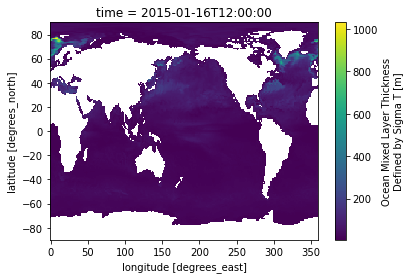

In [29]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [30]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/mlotst_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (802x404) to lonlat (360x180) grid, with source mask (208463)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 240 timesteps.
cdo    remapdis: Processed 77761920 values from 1 variable over 240 timesteps [7.33s 245MB].


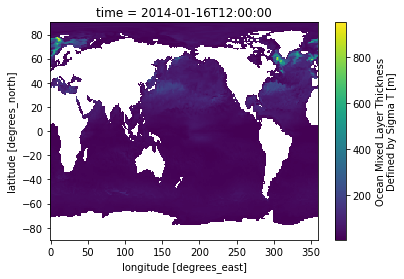

In [31]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice selection

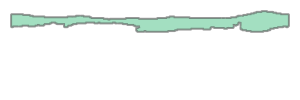

In [32]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [33]:
ice = gpd.GeoSeries(shape['geometry'][0])

### ssp585

In [34]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 16:49:38 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Deutsches Klimarechenzentrum, Hamburg 20146, Germany
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            mlotst
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by DKRZ is licensed und...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/85624f45-c8f7-4fd3-9443-672cb3acd4e7
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [35]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    mlotst       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 16:49:38 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Deutsches Klimarechenzentrum, Hamburg 20146, Germany
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            mlotst
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by DKRZ is licensed und...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/85624f45-c8f7-4fd3-9443-672cb3acd4e7
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [36]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

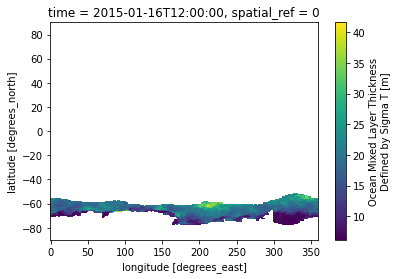

In [37]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [38]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### historical


In [39]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 240, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 16:50:06 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Max Planck Institute for Meteorology
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            mlotst
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/503021ac-2d0f-4026-899e-a60287e8242e
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [40]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 240, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    mlotst       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 16:50:06 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Max Planck Institute for Meteorology
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            mlotst
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/503021ac-2d0f-4026-899e-a60287e8242e
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [41]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

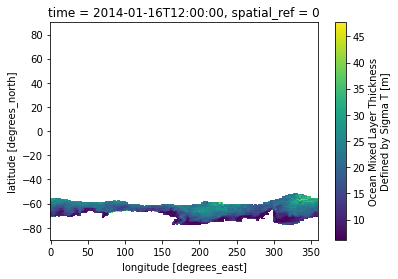

In [42]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [43]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## 20 year of sea ice area 

### historical

In [44]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    mlotst       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 16:50:06 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Max Planck Institute for Meteorology
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            mlotst
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/503021ac-2d0f-4026-899e-a60287e8242e
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [45]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 16:50:06 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Max Planck Institute for Meteorology
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            mlotst
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/503021ac-2d0f-4026-899e-a60287e8242e
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [46]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

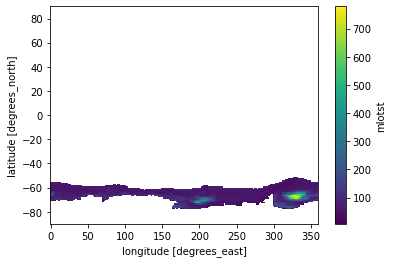

In [47]:
historical_mean[variable].plot()

In [48]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [49]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [50]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [51]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [52]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [53]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter.nc".format(variable, model), mode = "w", format = "NETCDF4")

### ssp585

In [54]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    mlotst       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 16:49:38 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Deutsches Klimarechenzentrum, Hamburg 20146, Germany
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            mlotst
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by DKRZ is licensed und...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/85624f45-c8f7-4fd3-9443-672cb3acd4e7
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [55]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 16:49:38 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Deutsches Klimarechenzentrum, Hamburg 20146, Germany
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            mlotst
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by DKRZ is licensed und...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/85624f45-c8f7-4fd3-9443-672cb3acd4e7
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [56]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

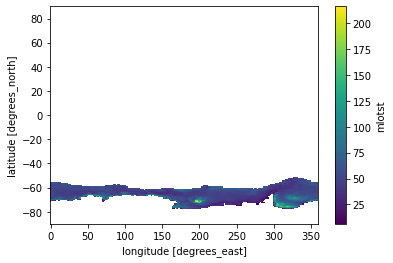

In [57]:
new_mean[variable].plot()

In [58]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [59]:
new_median = new_cropped.median(["lat","lon"])
new_median

<xarray.Dataset>
Dimensions:  (time: 240)
Coordinates:
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    mlotst   (time) float32 16.76 24.69 34.32 46.02 ... 80.65 59.87 24.35 17.75

In [60]:
new_median_mean = new_median.mean()
new_median_mean

<xarray.Dataset>
Dimensions:  ()
Data variables:
    mlotst   float32 48.54

#### Season

In [61]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [62]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [63]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [64]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [65]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [66]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [67]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

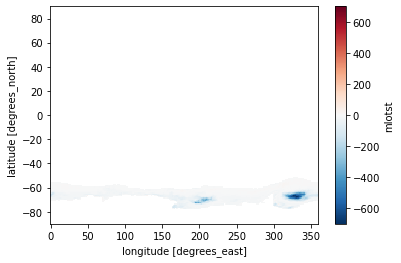

In [68]:
difference = new - historical
difference[variable].plot()
difference

In [69]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

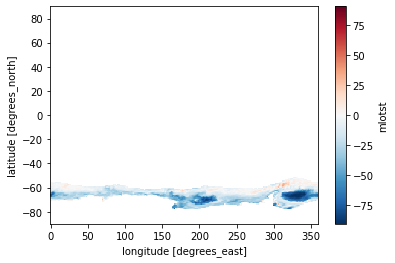

In [70]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [71]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

In [73]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

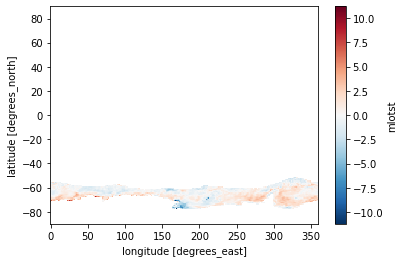

In [74]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [75]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

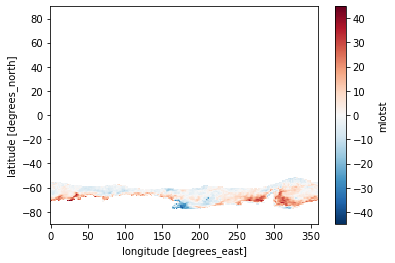

In [76]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [77]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [78]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

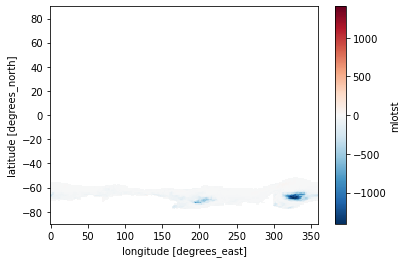

In [79]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [80]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

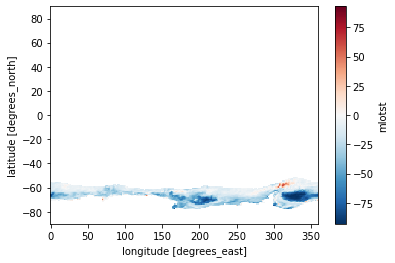

In [81]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [82]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Summary values

In [83]:
mean = (percentage.mean())[variable].values
median = (percentage.median())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
median_abs = (difference.median())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean, mean_abs, median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = -21.807065963745117% -32.731056213378906
Median change = -18.06228256225586% -10.251823425292969
Max inc = 35.10224533081055% 32.349609375
Max dec = -90.8062515258789% -701.671630859375


In [84]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                           mean, mean_abs, 
                                                                                                                           median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

In [85]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\nMean of 2081-2100 median value: {}m".format(new_median_mean[variable].values))
summary.close()

#### Season

In [86]:
mean_summer = (percentage_summer.mean())[variable].values
median_summer = (percentage_summer.median())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values


mean_abs_summer = (difference_summer.mean())[variable].values
median_abs_summer = (difference_summer.median())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [87]:
mean_winter = (percentage_winter.mean())[variable].values
median_winter = (percentage_winter.median())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
median_abs_winter = (difference_winter.median())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values

In [88]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nSummer:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                                    median_summer, median_abs_summer,
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [89]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                                     median_winter, median_abs_winter,
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Zonal Absolute/Percentage Change

In [90]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

#### Increasing

In [91]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    mlotst       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

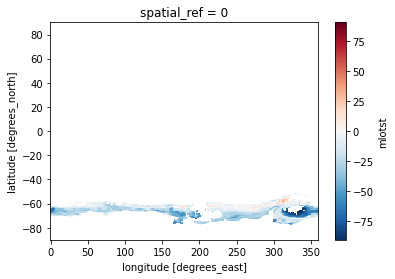

In [92]:
inc_area[variable].plot()

In [93]:
inc_area.to_netcdf(path = "Data/{}_{}_percentage_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [94]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    mlotst       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

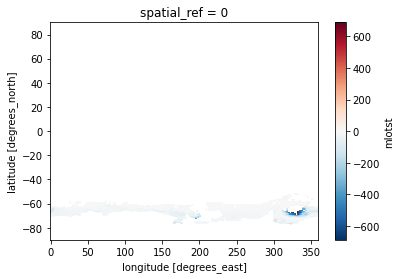

In [95]:
ab_inc_area[variable].plot()

In [96]:
ab_inc_area.to_netcdf(path = "Data/{}_{}_absolute_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [97]:
inc_mean = (inc_area.mean())[variable].values
inc_median = (inc_area.median())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_median_abs = (ab_inc_area.median())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = -21.530813217163086% -27.878555297851562
 Max inc = 35.10224533081055% 32.349609375
 Max dec = -90.65425109863281% -687.5018920898438



In [98]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                                                                                  inc_median, inc_median_abs,
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

#### Decreasing

In [99]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    mlotst       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

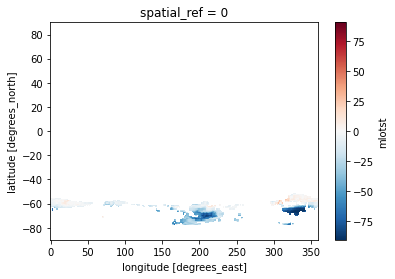

In [100]:
dec_area[variable].plot()

In [101]:
dec_area.to_netcdf(path = "Data/{}_{}_percentage_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [102]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    mlotst       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

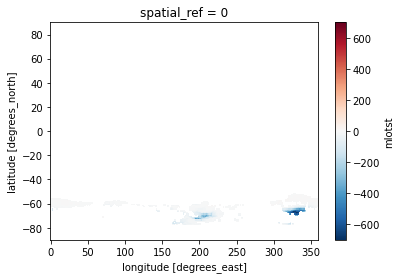

In [103]:
ab_dec_area[variable].plot()

In [104]:
ab_dec_area.to_netcdf(path = "Data/{}_{}_absolute_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [105]:
dec_mean = (dec_area.mean())[variable].values
dec_median = (dec_area.median())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_median_abs = (ab_dec_area.median())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = -22.29288673400879% -46.401798248291016
 Max inc = 27.150142669677734% 9.088253021240234
 Max dec = -90.8062515258789% -701.671630859375



In [106]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                                                                                dec_median, dec_median_abs,
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

## Absolute map

##### Mapping

In [50]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

In [107]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

In [108]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

#var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

778.816 6.333861


In [109]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

#var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

216.19362 6.259258


In [110]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

778.816 6.259258


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

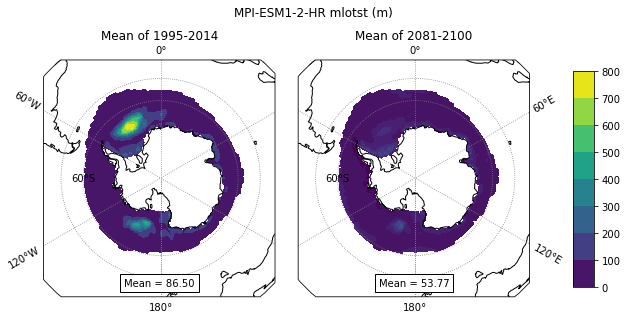

In [111]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Mean of 1995-2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2f}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Mean of 2081-2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2f}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## Percentage Change map

In [112]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    mlotst   (lat, lon) float32 ...

In [113]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

13.561100673675538 -56.973279571533205
35.102245 -90.80625


In [58]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

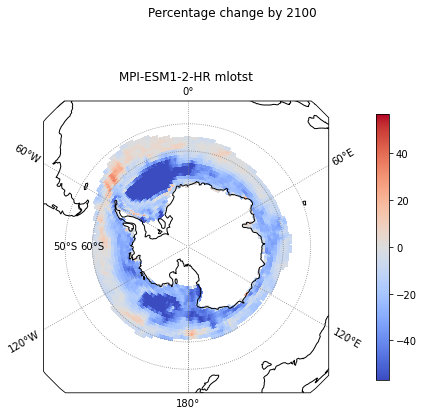

In [114]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

## Correlation with epc100

### Zonal

#### Inc

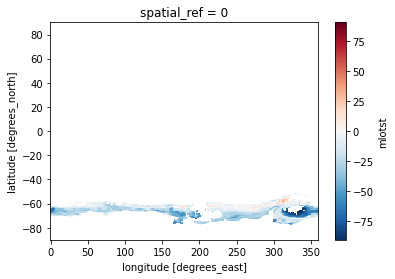

In [115]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
current_inc_per.plot()
exp_inc_per = xarray.open_dataarray("Data/epc100_{}_percentage_inc.nc".format(model), decode_coords="all")

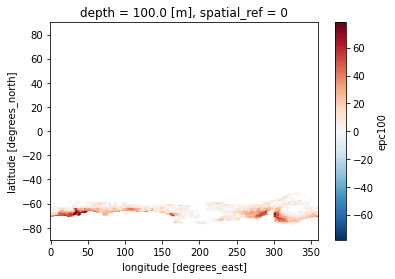

In [116]:
exp_inc_per.plot()

In [117]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.00482493)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [118]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.76913175)

In [119]:
current_inc_abs = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_abs = xarray.open_dataarray("Data/epc100_{}_absolute_inc.nc".format(model), decode_coords="all")

In [120]:
cor_inc_abs = xarray.corr(current_inc_abs, exp_inc_abs, dim = ["lat", "lon"])
cor_inc_abs

<xarray.DataArray ()>
array(0.13895817)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [121]:
cor_inc_abs_p = xs.pearson_r_p_value(current_inc_abs, exp_inc_abs, dim = ["lat", "lon"], skipna=True)
cor_inc_abs_p.values

array(1.9330356e-17)

In [122]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nPercentage correlation with epc100: {} p = {:.5f}\nAbsolute correlation with epc100: {} p = {:.5f}".format(cor_inc_per.values, 
                                                                                                                                                  cor_inc_per_p.values,
                                                                                                                                                  cor_inc_abs.values,
                                                                                                                                                 cor_inc_abs_p.values))
summary.close()

#### Dec

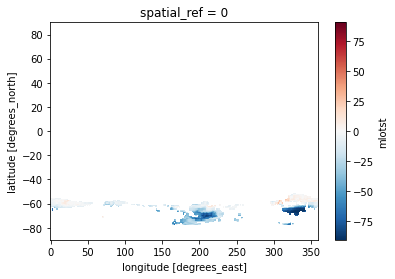

In [123]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
current_dec_per.plot()
exp_dec_per = xarray.open_dataarray("Data/epc100_{}_percentage_dec.nc".format(model), decode_coords="all")

In [124]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(-0.06267305)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [125]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(0.00437505)

In [126]:
current_dec_abs = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_abs = xarray.open_dataarray("Data/epc100_{}_absolute_dec.nc".format(model), decode_coords="all")

In [127]:
cor_dec_abs = xarray.corr(current_dec_abs, exp_dec_abs, dim = ["lat", "lon"])
cor_dec_abs

<xarray.DataArray ()>
array(-0.04583418)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [128]:
cor_dec_abs_p = xs.pearson_r_p_value(current_dec_abs, exp_dec_abs, dim = ["lat", "lon"], skipna=True)
cor_dec_abs_p.values

array(0.03705427)

In [129]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nPercentage correlation with epc100: {} p = {:.5f}\nAbsolute correlation with epc100: {} p = {:.5f}".format(cor_dec_per.values, 
                                                                                                                                                cor_dec_per_p.values,
                                                                                                                                                cor_dec_abs.values,
                                                                                                                                               cor_dec_abs_p.values))
summary.close()

### Seasonal

#### Summer

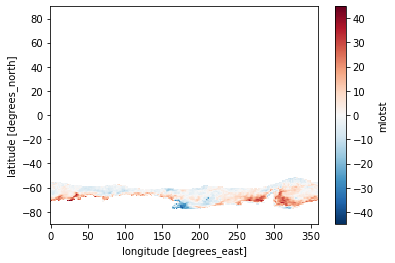

In [130]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
current_summer_per.plot()
exp_summer_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

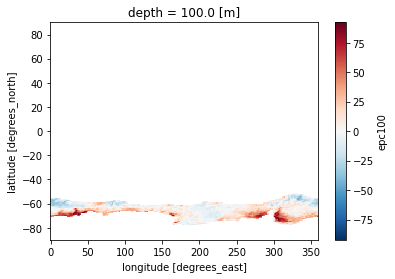

In [131]:
exp_summer_per.plot()

In [132]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.61116963)
Coordinates:
    depth    float64 100.0

In [133]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

In [134]:
current_summer_abs = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_abs = xarray.open_dataarray("Data/epc100_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

In [135]:
cor_summer_abs = xarray.corr(current_summer_abs, exp_summer_abs, dim = ["lat", "lon"])
cor_summer_abs

<xarray.DataArray ()>
array(0.47239958)
Coordinates:
    depth    float64 100.0

In [136]:
cor_summer_abs_p = xs.pearson_r_p_value(current_summer_abs, exp_summer_abs, dim = ["lat", "lon"], skipna=True)
cor_summer_abs_p.values

array(7.51196842e-268)

In [137]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSummer:\nPercentage correlation with epc100: {} p = {:.5f}\nAbsolute correlation with epc100: {} p = {:.5f}".format(cor_summer_per.values, 
                                                                                                                                                  cor_summer_per_p.values,
                                                                                                                                                  cor_summer_abs.values,
                                                                                                                                                 cor_summer_abs_p.values))
summary.close()

#### Winter

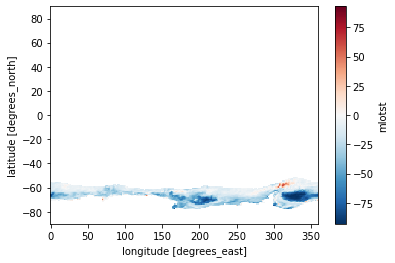

In [138]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
current_winter_per.plot()
exp_winter_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [139]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(0.18305308)
Coordinates:
    depth    float64 100.0

In [140]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(1.07961426e-37)

In [141]:
current_winter_abs = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_abs = xarray.open_dataarray("Data/epc100_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

In [142]:
cor_winter_abs = xarray.corr(current_winter_abs, exp_winter_abs, dim = ["lat", "lon"])
cor_winter_abs

<xarray.DataArray ()>
array(0.00048721)
Coordinates:
    depth    float64 100.0

In [143]:
cor_winter_abs_p = xs.pearson_r_p_value(current_winter_abs, exp_winter_abs, dim = ["lat", "lon"], skipna=True)
cor_winter_abs_p.values

array(0.97295667)

In [144]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nPercentage correlation with epc100: {} p = {:.5f}\nAbsolute correlation with epc100: {} p = {:.5f}".format(cor_winter_per.values, 
                                                                                                                                                cor_winter_per_p.values,
                                                                                                                                                cor_winter_abs.values,
                                                                                                                                               cor_winter_abs_p.values))
summary.close()